

Link para melhor visualização do Notebook em seu ambiente de execução: [Notebook Colab](https://colab.research.google.com/drive/1JGfatMMmlE8LWsH8ujhDXAimXWlhjNJW?usp=sharing)

---



Notebook desenvolvido para geração de arquivos estruturados de tal forma que a busca pelas frequências de tokens seja feita de forma rápida e eficaz, ao invés de passar pelo corpus inteiro contabilizando toda vez que desejar obter tais informações.

# Configuração de ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import output

import os
import msgpack
import time

Mounted at /content/drive


In [ ]:
def salvarResultadosEmMsgPack(nome_variavel : str,
                              variavel_em_questao,
                              pasta_para_salvar : str) -> tuple[bool,str]:
    """
    Função responsável por salvar, no formato "msgpack", alguma variável deste
    ambiente numa pasta especificada.

    ### Parâmetros:
    - nome_variavel: String contendo o nome da variável que será dado ao arquivo.
    - variavel_em_questao: Variável propriamente dita que se deseja salvar num
    arquivo.
    - pasta_para_salvar: String contendo o caminho até a pasta onde se deseja
    salvar o arquivo da variável em questão.

    ### Retornos:
    - Tupla com dois elementos. O primeiro do tipo bool que faz referência ao
    status do processo (True bem sucedido, False falhou) e o segundo do tipo
    string contendo a mensagem referente ao status obtido.
    """
    try:
        # Se a pasta não existir, efetuamos sua criação
        if not os.path.exists(pasta_para_salvar):
            os.makedirs(pasta_para_salvar)

        # Obtendo os bytes da variável que queremos salvar
        variable_bytes = msgpack.packb(variavel_em_questao)

        # Se o nome do arquivo que salvará a variável não tiver o formato msgpack ao final, iremos adicioná-lo.
        if not nome_variavel.endswith('.msgpack'):
            nome_variavel += '.msgpack'

        # Salvando a variável desejada em bytes no formato .msgpack
        with open(os.path.join(pasta_para_salvar,nome_variavel),'wb') as f:
            f.write(variable_bytes)
            f.close()
            return True, f'Variável {nome_variavel} salva com sucesso no formato .msgpack'

    # Caso ocorra algum erro inesperado, trataremos o enviando como mensagem de falha juntamente com um status False (de falha/erro no processo)
    except Exception as e:
        error_message = f'{e.__class__.__name__}: {str(e)}'
        return False, error_message

def abrirArquivoMsgPack(full_filepath : str,
                        encoding_type : str = None):
    """
    Função responsável por abrir os arquivos no formato msgpack.

    ### Parâmetros:
    - full_filepath: String contendo o caminho completo até o arquivo que deseja-se
    abrir e extrair o conteúdo (variável salva).
    - encoding_type: String contendo o tipo de encoding, caso desejar.

    ### Retornos:
    - Variável salva (e agora aberta e lida) no arquivo msgpack.
    """
    if not full_filepath.endswith('.msgpack'):
        full_filepath += '.msgpack'
    if encoding_type:
        with open(full_filepath,'rb',encoding=encoding_type) as f:
            variable_bytes = f.read()
            variable_loaded = msgpack.unpackb(variable_bytes, raw=False)
            f.close()
            return variable_loaded
    else:
        with open(full_filepath,'rb') as f:
            variable_bytes = f.read()
            variable_loaded = msgpack.unpackb(variable_bytes, raw=False)
            f.close()
            return variable_loaded

# Construção
Células utilizadas para criação dos arquivos que armazenarão as informações estruturadas para posterior utilização na hora de verificar as frequências.

Aqui foi pensado em deixar tudo em um arquivo só, mas depois pensamos melhor e vimos que isso poderia acabar usando bastante memória RAM na hora de carregar as informações desse "arquivão".

In [ ]:
pasta_colecoes = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Textos_pre_processados/Colecoes_textos_pre_processados'

colecoes = [os.path.join(pasta_colecoes,colecao) for colecao in os.listdir(pasta_colecoes) if '.' not in colecao]
# print(len(colecoes))
colecoes
qtd = 0
caminho_arquivo_d_c = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Textos_pre_processados/dic_contagens_ate_47_colec_17900_trabs.msgpack'
if os.path.exists(caminho_arquivo_d_c):
  print('Arquivo encontrado')
  d_c = abrirArquivoMsgPack(caminho_arquivo_d_c)
  for c in d_c.keys():
    for a in d_c[c].keys():
      qtd += len(d_c[c][a].keys())
else:
  d_c = {}
for i,colecao in enumerate(sorted(colecoes)):
  nome_colecao = os.path.basename(colecao)
  if nome_colecao not in d_c.keys():
    d_c[nome_colecao] = {}
  anos = [os.path.join(colecao,ano) for ano in os.listdir(colecao) if ano.isdigit()]
  for ano in anos:
    nome_ano = os.path.basename(ano)
    if nome_ano not in d_c[nome_colecao].keys():
      d_c[nome_colecao][nome_ano] = {}
    trabalhos = [os.path.join(ano,trabalho) for trabalho in os.listdir(ano) if trabalho.startswith('Trabalho') and trabalho not in d_c[nome_colecao][nome_ano].keys()]
    for j,trabalho in enumerate(trabalhos):
      nome_trabalho = os.path.basename(trabalho)
      arquivo = os.path.join(trabalho,'pre_processamento_c_re.msgpack')
      if os.path.exists(arquivo):
        pp = abrirArquivoMsgPack(arquivo)
        frases_juntas = [item for sublista in pp for item in sublista]
        d_c[nome_colecao][nome_ano][nome_trabalho] = {'total_de_palavras':len(frases_juntas),'contagens':{token: frases_juntas.count(token) for token in set(frases_juntas)}}
        qtd += 1
        output.clear()
        print('Coleção',i+1,'de',len(colecoes))
        print('Trabalho',j+1,'de',len(trabalhos))
        print(qtd)


Coleção 106 de 106
Trabalho 10 de 10
30664


In [ ]:
salvarResultadosEmMsgPack('dic_contagens_total_tokens_corpus',d_c,r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Textos_pre_processados')

(True,
 'Variável dic_contagens_total_tokens_corpus.msgpack salva com sucesso no formato .msgpack')

# Abertura do arquivo criado e criação de subpastas das coleções (arquivos separados para cada coleção)

In [ ]:
dc = abrirArquivoMsgPack(r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Frequência no corpus pré-processado/dic_contagens_total_tokens_corpus.msgpack')

In [ ]:
dc.keys()

dict_keys(['Administracao', 'Administracao_Universitaria_Mestrado_Profissional', 'Agroecossistemas', 'Agroecossistemas_Mestrado_Profissional', 'Antropologia_Social', 'Aquicultura', 'Arquitetura_e_Urbanismo', 'Assistencia_Farmaceutica', 'Biologia_Celular_e_do_Desenvolvimento', 'Biologia_Vegetal', 'Biologia_de_Fungos_Algas_e_Plantas', 'Bioquimica', 'Biotecnologia', 'Biotecnologia_e_Biociencias', 'Ciencia_da_Computacao', 'Ciencia_da_Informacao', 'Ciencia_dos_Alimentos', 'Ciencia_e_Engenharia_de_Materiais', 'Ciencias_Medicas', 'Ciencias_da_Reabilitacao', 'Contabilidade', 'Controle_de_Gestao_Mestrado_Profissional', 'Cuidados_Intensivos_e_Paliativos_Mestrado_Profissional', 'Desastres_Naturais_Mestrado_Profissional', 'Design', 'Design_e_Expressao_Grafica', 'Direito', 'Direito_Mestrado_Profissional', 'Ecologia', 'Economia', 'Ecossistemas_Agricolas_e_Naturais', 'Educacao', 'Educacao_Cientifica_e_Tecnologica', 'Educacao_Fisica', 'Energia_e_Sustentabilidade', 'Enfermagem', 'Engenharia_Ambiental',

In [ ]:
dc['Administracao']['2006']['Trabalho 400']

## Criação das subpastas e dics específicos

In [ ]:
caminho_pasta_corpus_freq = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Frequência no corpus pré-processado'

for colecao in sorted(dc.keys()):
  print(colecao)
  caminho_save = os.path.join(caminho_pasta_corpus_freq,colecao)
  os.makedirs(caminho_save,exist_ok=True)
  for ano in sorted(dc[colecao].keys()):
    nome_arq = f'dic_frequencias_{colecao}_{ano}.msgpack'
    if not os.path.exists(os.path.join(caminho_save,nome_arq)):
      status, msg = salvarResultadosEmMsgPack(nome_arq,dc[colecao][ano],caminho_save)
      print(ano,'-',status)
    else:
      print(ano,'- já existe')
  print('')


Administracao
2003 - True
2004 - True
2005 - True
2006 - True
2007 - True
2008 - True
2009 - True
2010 - True
2011 - True
2012 - True
2013 - True
2014 - True
2015 - True
2016 - True
2017 - True
2018 - True
2019 - True
2020 - True
2021 - True
2022 - True
2023 - True

Administracao_Universitaria_Mestrado_Profissional
2012 - True
2013 - True
2014 - True
2015 - True
2016 - True
2017 - True
2018 - True
2019 - True
2020 - True
2021 - True
2022 - True
2023 - True

Agroecossistemas
2003 - True
2004 - True
2005 - True
2006 - True
2007 - True
2008 - True
2009 - True
2010 - True
2011 - True
2012 - True
2013 - True
2014 - True
2015 - True
2016 - True
2017 - True
2018 - True
2019 - True
2020 - True
2021 - True
2022 - True
2023 - True

Agroecossistemas_Mestrado_Profissional
2012 - True
2013 - True
2014 - True
2015 - True
2016 - True
2017 - True
2018 - True

Antropologia_Social
2003 - True
2004 - True
2005 - True
2006 - True
2007 - True
2008 - True
2009 - True
2010 - True
2011 - True
2012 - True
2013

# Abertura das subpastas e dicts específicos

In [ ]:
caminho_pasta_corpus_freq = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Frequência no corpus pré-processado'

In [ ]:
len([pasta for pasta in os.listdir(caminho_pasta_corpus_freq) if '.' not in pasta])

106

In [ ]:

def coletarFrequenciasNoCorpus(nome_modelo : str,
                               tokens : list[str],
                               anos : list[str] = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'],
                               caminho_pasta_corpus_freq : str = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Frequência no corpus pré-processado'):

  if 'UFSC' in nome_modelo:
    lista_colecoes = 'todas'
  elif 'CFH' in nome_modelo:
    lista_colecoes = ['Filosofia','Geografia','Geologia','Historia','Psicologia','Teses_e_dissertacoes_do_Centro_de_Filosofia_e_Ciencias_Humanas','Programa_de_Pos_Graduacao_Interdisciplinar_em_Ciencias_Humanas','Servico_Social','Sociologia_e_Ciencia_Politica','Sociologia_Politica','Saude_Mental_e_Atencao_Psicossocial_Mestrado_Profissional','Ensino_de_Historia_Mestrado_Profissional']
  elif 'HST' in nome_modelo:
    lista_colecoes = ['Historia']
  elif 'SAUDE-CORPO' in nome_modelo:
    lista_colecoes = ['Biologia_Celular_e_do_Desenvolvimento','Biotecnologia_e_Biociencias','Ciencias_da_Reabilitacao','Ciencias_Medicas','Cuidados_Intensivos_e_Paliativos_Mestrado_Profissional',
                     'Educacao_Fisica','Enfermagem','Gestao_do_Cuidado_em_Enfermagem','Gestao_do_Cuidado_em_Enfermagem_Mestrado_Profissional','Medicina_Veterinaria_Convencional_e_Integrativa',
                     'Neurociencias','Saude_Coletiva','Saude_Mental_e_Atencao_Psicossocial_Mestrado_Profissional','Saude_Publica','Programa_de_Pos_Graduacao_Multidisciplinar_em_Saude_Mestrado_Profissional']
  else:
    lista_colecoes = []

  if lista_colecoes == 'todas':
    colecoes = sorted([colecao for colecao in os.listdir(caminho_pasta_corpus_freq) if '.' not in colecao])
  else:
    colecoes = sorted([colecao for colecao in os.listdir(caminho_pasta_corpus_freq) if colecao in lista_colecoes])

  dic_contagens = {ano:{'total_de_palavras':0,'contagens':{token:{'frequencia_normal':0,'frequencia_relativa':0} for token in sorted(tokens)}} for ano in sorted(anos)}

  for ano in dic_contagens.keys():
    for colecao in colecoes:
      caminho_colecao = os.path.join(caminho_pasta_corpus_freq,colecao)
      for caminho_dic in [os.path.join(caminho_colecao,d) for d in os.listdir(caminho_colecao) if d.startswith('dic_') and d.endswith(f'{ano}.msgpack')]:
        dic_atual = abrirArquivoMsgPack(caminho_dic)
        for trabalho in dic_atual.keys():
          l_tokens = dic_atual[trabalho]['contagens'].keys()
          dic_contagens[ano]['total_de_palavras'] += dic_atual[trabalho]['total_de_palavras']
          for token in dic_contagens[ano]['contagens'].keys():
            if token in l_tokens:
              dic_contagens[ano]['contagens'][token]['frequencia_normal'] += dic_atual[trabalho]['contagens'][token]
    for token in dic_contagens[ano]['contagens'].keys():
      if dic_contagens[ano]['total_de_palavras'] != 0:
        dic_contagens[ano]['contagens'][token]['frequencia_relativa'] = round(dic_contagens[ano]['contagens'][token]['frequencia_normal']/dic_contagens[ano]['total_de_palavras'],8)

  return dic_contagens


## Testes

### Teste usando coleções de CFH

In [ ]:
t1 = time.time()
dic_contagens = coletarFrequenciasNoCorpus(nome_modelo='WOKE_2_CFH_w2v_tmp',tokens=['classe','gênero','raça','etnia','classe_social'])
t2 = time.time()
print(t2-t1)

for ano in dic_contagens.keys():
    print(ano)
    display(dic_contagens[ano])
    print('\n')

63.65421748161316
2003


{'total_de_palavras': 2691470,
 'contagens': {'classe': {'frequencia_normal': 709,
   'frequencia_relativa': 0.00026342},
  'classe_social': {'frequencia_normal': 36, 'frequencia_relativa': 1.338e-05},
  'etnia': {'frequencia_normal': 99, 'frequencia_relativa': 3.678e-05},
  'gênero': {'frequencia_normal': 799, 'frequencia_relativa': 0.00029686},
  'raça': {'frequencia_normal': 221, 'frequencia_relativa': 8.211e-05}}}



2004


{'total_de_palavras': 3111357,
 'contagens': {'classe': {'frequencia_normal': 1495,
   'frequencia_relativa': 0.0004805},
  'classe_social': {'frequencia_normal': 82, 'frequencia_relativa': 2.636e-05},
  'etnia': {'frequencia_normal': 92, 'frequencia_relativa': 2.957e-05},
  'gênero': {'frequencia_normal': 1418, 'frequencia_relativa': 0.00045575},
  'raça': {'frequencia_normal': 158, 'frequencia_relativa': 5.078e-05}}}



2005


{'total_de_palavras': 3707556,
 'contagens': {'classe': {'frequencia_normal': 1619,
   'frequencia_relativa': 0.00043668},
  'classe_social': {'frequencia_normal': 129,
   'frequencia_relativa': 3.479e-05},
  'etnia': {'frequencia_normal': 196, 'frequencia_relativa': 5.287e-05},
  'gênero': {'frequencia_normal': 2491, 'frequencia_relativa': 0.00067187},
  'raça': {'frequencia_normal': 224, 'frequencia_relativa': 6.042e-05}}}



2006


{'total_de_palavras': 4680201,
 'contagens': {'classe': {'frequencia_normal': 2089,
   'frequencia_relativa': 0.00044635},
  'classe_social': {'frequencia_normal': 107,
   'frequencia_relativa': 2.286e-05},
  'etnia': {'frequencia_normal': 107, 'frequencia_relativa': 2.286e-05},
  'gênero': {'frequencia_normal': 1181, 'frequencia_relativa': 0.00025234},
  'raça': {'frequencia_normal': 300, 'frequencia_relativa': 6.41e-05}}}



2007


{'total_de_palavras': 4182810,
 'contagens': {'classe': {'frequencia_normal': 1721,
   'frequencia_relativa': 0.00041145},
  'classe_social': {'frequencia_normal': 67, 'frequencia_relativa': 1.602e-05},
  'etnia': {'frequencia_normal': 99, 'frequencia_relativa': 2.367e-05},
  'gênero': {'frequencia_normal': 1645, 'frequencia_relativa': 0.00039328},
  'raça': {'frequencia_normal': 136, 'frequencia_relativa': 3.251e-05}}}



2008


{'total_de_palavras': 5645745,
 'contagens': {'classe': {'frequencia_normal': 13145,
   'frequencia_relativa': 0.0023283},
  'classe_social': {'frequencia_normal': 121,
   'frequencia_relativa': 2.143e-05},
  'etnia': {'frequencia_normal': 295, 'frequencia_relativa': 5.225e-05},
  'gênero': {'frequencia_normal': 2154, 'frequencia_relativa': 0.00038153},
  'raça': {'frequencia_normal': 343, 'frequencia_relativa': 6.075e-05}}}



2009


{'total_de_palavras': 4799337,
 'contagens': {'classe': {'frequencia_normal': 4105,
   'frequencia_relativa': 0.00085533},
  'classe_social': {'frequencia_normal': 141,
   'frequencia_relativa': 2.938e-05},
  'etnia': {'frequencia_normal': 144, 'frequencia_relativa': 3e-05},
  'gênero': {'frequencia_normal': 1916, 'frequencia_relativa': 0.00039922},
  'raça': {'frequencia_normal': 190, 'frequencia_relativa': 3.959e-05}}}



2010


{'total_de_palavras': 5319028,
 'contagens': {'classe': {'frequencia_normal': 3185,
   'frequencia_relativa': 0.00059879},
  'classe_social': {'frequencia_normal': 114,
   'frequencia_relativa': 2.143e-05},
  'etnia': {'frequencia_normal': 128, 'frequencia_relativa': 2.406e-05},
  'gênero': {'frequencia_normal': 1950, 'frequencia_relativa': 0.00036661},
  'raça': {'frequencia_normal': 300, 'frequencia_relativa': 5.64e-05}}}



2011


{'total_de_palavras': 5360794,
 'contagens': {'classe': {'frequencia_normal': 5426,
   'frequencia_relativa': 0.00101216},
  'classe_social': {'frequencia_normal': 140,
   'frequencia_relativa': 2.612e-05},
  'etnia': {'frequencia_normal': 182, 'frequencia_relativa': 3.395e-05},
  'gênero': {'frequencia_normal': 2206, 'frequencia_relativa': 0.00041151},
  'raça': {'frequencia_normal': 329, 'frequencia_relativa': 6.137e-05}}}



2012


{'total_de_palavras': 5709385,
 'contagens': {'classe': {'frequencia_normal': 1771,
   'frequencia_relativa': 0.00031019},
  'classe_social': {'frequencia_normal': 123,
   'frequencia_relativa': 2.154e-05},
  'etnia': {'frequencia_normal': 185, 'frequencia_relativa': 3.24e-05},
  'gênero': {'frequencia_normal': 1940, 'frequencia_relativa': 0.00033979},
  'raça': {'frequencia_normal': 504, 'frequencia_relativa': 8.828e-05}}}



2013


{'total_de_palavras': 6599711,
 'contagens': {'classe': {'frequencia_normal': 12017,
   'frequencia_relativa': 0.00182084},
  'classe_social': {'frequencia_normal': 104,
   'frequencia_relativa': 1.576e-05},
  'etnia': {'frequencia_normal': 122, 'frequencia_relativa': 1.849e-05},
  'gênero': {'frequencia_normal': 2231, 'frequencia_relativa': 0.00033805},
  'raça': {'frequencia_normal': 355, 'frequencia_relativa': 5.379e-05}}}



2014


{'total_de_palavras': 5963543,
 'contagens': {'classe': {'frequencia_normal': 2925,
   'frequencia_relativa': 0.00049048},
  'classe_social': {'frequencia_normal': 144,
   'frequencia_relativa': 2.415e-05},
  'etnia': {'frequencia_normal': 223, 'frequencia_relativa': 3.739e-05},
  'gênero': {'frequencia_normal': 3511, 'frequencia_relativa': 0.00058874},
  'raça': {'frequencia_normal': 572, 'frequencia_relativa': 9.592e-05}}}



2015


{'total_de_palavras': 7531934,
 'contagens': {'classe': {'frequencia_normal': 3411,
   'frequencia_relativa': 0.00045287},
  'classe_social': {'frequencia_normal': 164,
   'frequencia_relativa': 2.177e-05},
  'etnia': {'frequencia_normal': 340, 'frequencia_relativa': 4.514e-05},
  'gênero': {'frequencia_normal': 3738, 'frequencia_relativa': 0.00049629},
  'raça': {'frequencia_normal': 1108, 'frequencia_relativa': 0.00014711}}}



2016


{'total_de_palavras': 6945822,
 'contagens': {'classe': {'frequencia_normal': 2785,
   'frequencia_relativa': 0.00040096},
  'classe_social': {'frequencia_normal': 137,
   'frequencia_relativa': 1.972e-05},
  'etnia': {'frequencia_normal': 203, 'frequencia_relativa': 2.923e-05},
  'gênero': {'frequencia_normal': 3609, 'frequencia_relativa': 0.00051959},
  'raça': {'frequencia_normal': 544, 'frequencia_relativa': 7.832e-05}}}



2017


{'total_de_palavras': 8050486,
 'contagens': {'classe': {'frequencia_normal': 4045,
   'frequencia_relativa': 0.00050245},
  'classe_social': {'frequencia_normal': 268,
   'frequencia_relativa': 3.329e-05},
  'etnia': {'frequencia_normal': 424, 'frequencia_relativa': 5.267e-05},
  'gênero': {'frequencia_normal': 4862, 'frequencia_relativa': 0.00060394},
  'raça': {'frequencia_normal': 1104, 'frequencia_relativa': 0.00013713}}}



2018


{'total_de_palavras': 7918218,
 'contagens': {'classe': {'frequencia_normal': 4493,
   'frequencia_relativa': 0.00056743},
  'classe_social': {'frequencia_normal': 247,
   'frequencia_relativa': 3.119e-05},
  'etnia': {'frequencia_normal': 280, 'frequencia_relativa': 3.536e-05},
  'gênero': {'frequencia_normal': 4553, 'frequencia_relativa': 0.000575},
  'raça': {'frequencia_normal': 878, 'frequencia_relativa': 0.00011088}}}



2019


{'total_de_palavras': 6982861,
 'contagens': {'classe': {'frequencia_normal': 2933,
   'frequencia_relativa': 0.00042003},
  'classe_social': {'frequencia_normal': 147,
   'frequencia_relativa': 2.105e-05},
  'etnia': {'frequencia_normal': 282, 'frequencia_relativa': 4.038e-05},
  'gênero': {'frequencia_normal': 4241, 'frequencia_relativa': 0.00060734},
  'raça': {'frequencia_normal': 918, 'frequencia_relativa': 0.00013146}}}



2020


{'total_de_palavras': 5949416,
 'contagens': {'classe': {'frequencia_normal': 3827,
   'frequencia_relativa': 0.00064326},
  'classe_social': {'frequencia_normal': 191, 'frequencia_relativa': 3.21e-05},
  'etnia': {'frequencia_normal': 314, 'frequencia_relativa': 5.278e-05},
  'gênero': {'frequencia_normal': 5417, 'frequencia_relativa': 0.00091051},
  'raça': {'frequencia_normal': 1321, 'frequencia_relativa': 0.00022204}}}



2021


{'total_de_palavras': 6177086,
 'contagens': {'classe': {'frequencia_normal': 3078,
   'frequencia_relativa': 0.00049829},
  'classe_social': {'frequencia_normal': 191,
   'frequencia_relativa': 3.092e-05},
  'etnia': {'frequencia_normal': 505, 'frequencia_relativa': 8.175e-05},
  'gênero': {'frequencia_normal': 5709, 'frequencia_relativa': 0.00092422},
  'raça': {'frequencia_normal': 1227, 'frequencia_relativa': 0.00019864}}}



2022


{'total_de_palavras': 5947293,
 'contagens': {'classe': {'frequencia_normal': 3865,
   'frequencia_relativa': 0.00064988},
  'classe_social': {'frequencia_normal': 152,
   'frequencia_relativa': 2.556e-05},
  'etnia': {'frequencia_normal': 258, 'frequencia_relativa': 4.338e-05},
  'gênero': {'frequencia_normal': 4513, 'frequencia_relativa': 0.00075883},
  'raça': {'frequencia_normal': 1201, 'frequencia_relativa': 0.00020194}}}



2023


{'total_de_palavras': 4438413,
 'contagens': {'classe': {'frequencia_normal': 2146,
   'frequencia_relativa': 0.00048351},
  'classe_social': {'frequencia_normal': 114,
   'frequencia_relativa': 2.568e-05},
  'etnia': {'frequencia_normal': 204, 'frequencia_relativa': 4.596e-05},
  'gênero': {'frequencia_normal': 4615, 'frequencia_relativa': 0.00103979},
  'raça': {'frequencia_normal': 777, 'frequencia_relativa': 0.00017506}}}

### Teste usando coleções de HST

In [ ]:
t1 = time.time()
dic_contagens = coletarFrequenciasNoCorpus(nome_modelo='WOKE_2_HST_w2v_tmp',tokens=['classe','gênero','raça','etnia','classe_social'])
t2 = time.time()
print(t2-t1)

for ano in dic_contagens.keys():
    print(ano)
    display(dic_contagens[ano])
    print('\n')


2.8837740421295166
2003


{'total_de_palavras': 441061,
 'contagens': {'classe': {'frequencia_normal': 121,
   'frequencia_relativa': 0.00027434},
  'classe_social': {'frequencia_normal': 5, 'frequencia_relativa': 1.134e-05},
  'etnia': {'frequencia_normal': 20, 'frequencia_relativa': 4.535e-05},
  'gênero': {'frequencia_normal': 233, 'frequencia_relativa': 0.00052827},
  'raça': {'frequencia_normal': 84, 'frequencia_relativa': 0.00019045}}}



2004


{'total_de_palavras': 566288,
 'contagens': {'classe': {'frequencia_normal': 327,
   'frequencia_relativa': 0.00057744},
  'classe_social': {'frequencia_normal': 21, 'frequencia_relativa': 3.708e-05},
  'etnia': {'frequencia_normal': 24, 'frequencia_relativa': 4.238e-05},
  'gênero': {'frequencia_normal': 265, 'frequencia_relativa': 0.00046796},
  'raça': {'frequencia_normal': 70, 'frequencia_relativa': 0.00012361}}}



2005


{'total_de_palavras': 534896,
 'contagens': {'classe': {'frequencia_normal': 180,
   'frequencia_relativa': 0.00033651},
  'classe_social': {'frequencia_normal': 8, 'frequencia_relativa': 1.496e-05},
  'etnia': {'frequencia_normal': 45, 'frequencia_relativa': 8.413e-05},
  'gênero': {'frequencia_normal': 81, 'frequencia_relativa': 0.00015143},
  'raça': {'frequencia_normal': 65, 'frequencia_relativa': 0.00012152}}}



2006


{'total_de_palavras': 807872,
 'contagens': {'classe': {'frequencia_normal': 302,
   'frequencia_relativa': 0.00037382},
  'classe_social': {'frequencia_normal': 10, 'frequencia_relativa': 1.238e-05},
  'etnia': {'frequencia_normal': 27, 'frequencia_relativa': 3.342e-05},
  'gênero': {'frequencia_normal': 129, 'frequencia_relativa': 0.00015968},
  'raça': {'frequencia_normal': 199, 'frequencia_relativa': 0.00024633}}}



2007


{'total_de_palavras': 517764,
 'contagens': {'classe': {'frequencia_normal': 118,
   'frequencia_relativa': 0.0002279},
  'classe_social': {'frequencia_normal': 12, 'frequencia_relativa': 2.318e-05},
  'etnia': {'frequencia_normal': 20, 'frequencia_relativa': 3.863e-05},
  'gênero': {'frequencia_normal': 149, 'frequencia_relativa': 0.00028778},
  'raça': {'frequencia_normal': 33, 'frequencia_relativa': 6.374e-05}}}



2008


{'total_de_palavras': 1205626,
 'contagens': {'classe': {'frequencia_normal': 430,
   'frequencia_relativa': 0.00035666},
  'classe_social': {'frequencia_normal': 22, 'frequencia_relativa': 1.825e-05},
  'etnia': {'frequencia_normal': 76, 'frequencia_relativa': 6.304e-05},
  'gênero': {'frequencia_normal': 846, 'frequencia_relativa': 0.00070171},
  'raça': {'frequencia_normal': 146, 'frequencia_relativa': 0.0001211}}}



2009


{'total_de_palavras': 716012,
 'contagens': {'classe': {'frequencia_normal': 301,
   'frequencia_relativa': 0.00042038},
  'classe_social': {'frequencia_normal': 10, 'frequencia_relativa': 1.397e-05},
  'etnia': {'frequencia_normal': 67, 'frequencia_relativa': 9.357e-05},
  'gênero': {'frequencia_normal': 410, 'frequencia_relativa': 0.00057262},
  'raça': {'frequencia_normal': 52, 'frequencia_relativa': 7.262e-05}}}



2010


{'total_de_palavras': 759274,
 'contagens': {'classe': {'frequencia_normal': 328,
   'frequencia_relativa': 0.00043199},
  'classe_social': {'frequencia_normal': 20, 'frequencia_relativa': 2.634e-05},
  'etnia': {'frequencia_normal': 32, 'frequencia_relativa': 4.215e-05},
  'gênero': {'frequencia_normal': 478, 'frequencia_relativa': 0.00062955},
  'raça': {'frequencia_normal': 135, 'frequencia_relativa': 0.0001778}}}



2011


{'total_de_palavras': 1112254,
 'contagens': {'classe': {'frequencia_normal': 460,
   'frequencia_relativa': 0.00041357},
  'classe_social': {'frequencia_normal': 21, 'frequencia_relativa': 1.888e-05},
  'etnia': {'frequencia_normal': 78, 'frequencia_relativa': 7.013e-05},
  'gênero': {'frequencia_normal': 299, 'frequencia_relativa': 0.00026882},
  'raça': {'frequencia_normal': 123, 'frequencia_relativa': 0.00011059}}}



2012


{'total_de_palavras': 813186,
 'contagens': {'classe': {'frequencia_normal': 150,
   'frequencia_relativa': 0.00018446},
  'classe_social': {'frequencia_normal': 16, 'frequencia_relativa': 1.968e-05},
  'etnia': {'frequencia_normal': 20, 'frequencia_relativa': 2.459e-05},
  'gênero': {'frequencia_normal': 147, 'frequencia_relativa': 0.00018077},
  'raça': {'frequencia_normal': 163, 'frequencia_relativa': 0.00020045}}}



2013


{'total_de_palavras': 1174907,
 'contagens': {'classe': {'frequencia_normal': 602,
   'frequencia_relativa': 0.00051238},
  'classe_social': {'frequencia_normal': 15, 'frequencia_relativa': 1.277e-05},
  'etnia': {'frequencia_normal': 49, 'frequencia_relativa': 4.171e-05},
  'gênero': {'frequencia_normal': 495, 'frequencia_relativa': 0.00042131},
  'raça': {'frequencia_normal': 105, 'frequencia_relativa': 8.937e-05}}}



2014


{'total_de_palavras': 1294230,
 'contagens': {'classe': {'frequencia_normal': 446,
   'frequencia_relativa': 0.00034461},
  'classe_social': {'frequencia_normal': 26, 'frequencia_relativa': 2.009e-05},
  'etnia': {'frequencia_normal': 23, 'frequencia_relativa': 1.777e-05},
  'gênero': {'frequencia_normal': 1079, 'frequencia_relativa': 0.0008337},
  'raça': {'frequencia_normal': 195, 'frequencia_relativa': 0.00015067}}}



2015


{'total_de_palavras': 1414159,
 'contagens': {'classe': {'frequencia_normal': 377,
   'frequencia_relativa': 0.00026659},
  'classe_social': {'frequencia_normal': 15, 'frequencia_relativa': 1.061e-05},
  'etnia': {'frequencia_normal': 65, 'frequencia_relativa': 4.596e-05},
  'gênero': {'frequencia_normal': 660, 'frequencia_relativa': 0.00046671},
  'raça': {'frequencia_normal': 212, 'frequencia_relativa': 0.00014991}}}



2016


{'total_de_palavras': 1302875,
 'contagens': {'classe': {'frequencia_normal': 606,
   'frequencia_relativa': 0.00046513},
  'classe_social': {'frequencia_normal': 25, 'frequencia_relativa': 1.919e-05},
  'etnia': {'frequencia_normal': 46, 'frequencia_relativa': 3.531e-05},
  'gênero': {'frequencia_normal': 1111, 'frequencia_relativa': 0.00085273},
  'raça': {'frequencia_normal': 174, 'frequencia_relativa': 0.00013355}}}



2017


{'total_de_palavras': 1580236,
 'contagens': {'classe': {'frequencia_normal': 705,
   'frequencia_relativa': 0.00044614},
  'classe_social': {'frequencia_normal': 42, 'frequencia_relativa': 2.658e-05},
  'etnia': {'frequencia_normal': 123, 'frequencia_relativa': 7.784e-05},
  'gênero': {'frequencia_normal': 781, 'frequencia_relativa': 0.00049423},
  'raça': {'frequencia_normal': 449, 'frequencia_relativa': 0.00028413}}}



2018


{'total_de_palavras': 1345667,
 'contagens': {'classe': {'frequencia_normal': 482,
   'frequencia_relativa': 0.00035819},
  'classe_social': {'frequencia_normal': 31, 'frequencia_relativa': 2.304e-05},
  'etnia': {'frequencia_normal': 48, 'frequencia_relativa': 3.567e-05},
  'gênero': {'frequencia_normal': 838, 'frequencia_relativa': 0.00062274},
  'raça': {'frequencia_normal': 219, 'frequencia_relativa': 0.00016274}}}



2019


{'total_de_palavras': 1625767,
 'contagens': {'classe': {'frequencia_normal': 774,
   'frequencia_relativa': 0.00047608},
  'classe_social': {'frequencia_normal': 28, 'frequencia_relativa': 1.722e-05},
  'etnia': {'frequencia_normal': 34, 'frequencia_relativa': 2.091e-05},
  'gênero': {'frequencia_normal': 1050, 'frequencia_relativa': 0.00064585},
  'raça': {'frequencia_normal': 236, 'frequencia_relativa': 0.00014516}}}



2020


{'total_de_palavras': 1297118,
 'contagens': {'classe': {'frequencia_normal': 709,
   'frequencia_relativa': 0.0005466},
  'classe_social': {'frequencia_normal': 25, 'frequencia_relativa': 1.927e-05},
  'etnia': {'frequencia_normal': 70, 'frequencia_relativa': 5.397e-05},
  'gênero': {'frequencia_normal': 1510, 'frequencia_relativa': 0.00116412},
  'raça': {'frequencia_normal': 355, 'frequencia_relativa': 0.00027368}}}



2021


{'total_de_palavras': 1197098,
 'contagens': {'classe': {'frequencia_normal': 341,
   'frequencia_relativa': 0.00028486},
  'classe_social': {'frequencia_normal': 12, 'frequencia_relativa': 1.002e-05},
  'etnia': {'frequencia_normal': 49, 'frequencia_relativa': 4.093e-05},
  'gênero': {'frequencia_normal': 648, 'frequencia_relativa': 0.00054131},
  'raça': {'frequencia_normal': 155, 'frequencia_relativa': 0.00012948}}}



2022


{'total_de_palavras': 1227719,
 'contagens': {'classe': {'frequencia_normal': 643,
   'frequencia_relativa': 0.00052374},
  'classe_social': {'frequencia_normal': 23, 'frequencia_relativa': 1.873e-05},
  'etnia': {'frequencia_normal': 37, 'frequencia_relativa': 3.014e-05},
  'gênero': {'frequencia_normal': 1229, 'frequencia_relativa': 0.00100104},
  'raça': {'frequencia_normal': 434, 'frequencia_relativa': 0.0003535}}}



2023


{'total_de_palavras': 1173708,
 'contagens': {'classe': {'frequencia_normal': 278,
   'frequencia_relativa': 0.00023686},
  'classe_social': {'frequencia_normal': 15, 'frequencia_relativa': 1.278e-05},
  'etnia': {'frequencia_normal': 39, 'frequencia_relativa': 3.323e-05},
  'gênero': {'frequencia_normal': 1380, 'frequencia_relativa': 0.00117576},
  'raça': {'frequencia_normal': 138, 'frequencia_relativa': 0.00011758}}}

### Teste usando coleções de UFSC

In [ ]:
t1 = time.time()
dic_contagens = coletarFrequenciasNoCorpus(nome_modelo='WOKE_1_UFSC_w2v_tmp',tokens=['futebol','bolsonaro','mussolini','braqueamento','afrodescendente'])
t2 = time.time()
print(t2-t1)

for ano in dic_contagens.keys():
    print(ano)
    display(dic_contagens[ano])
    print('\n')


89.54440879821777
2003


{'total_de_palavras': 29398266,
 'contagens': {'afrodescendente': {'frequencia_normal': 6,
   'frequencia_relativa': 2e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1024, 'frequencia_relativa': 3.483e-05},
  'mussolini': {'frequencia_normal': 8, 'frequencia_relativa': 2.7e-07}}}



2004


{'total_de_palavras': 24036761,
 'contagens': {'afrodescendente': {'frequencia_normal': 3,
   'frequencia_relativa': 1.2e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 664, 'frequencia_relativa': 2.762e-05},
  'mussolini': {'frequencia_normal': 15, 'frequencia_relativa': 6.2e-07}}}



2005


{'total_de_palavras': 24191918,
 'contagens': {'afrodescendente': {'frequencia_normal': 0,
   'frequencia_relativa': 0.0},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1694, 'frequencia_relativa': 7.002e-05},
  'mussolini': {'frequencia_normal': 9, 'frequencia_relativa': 3.7e-07}}}



2006


{'total_de_palavras': 25782532,
 'contagens': {'afrodescendente': {'frequencia_normal': 21,
   'frequencia_relativa': 8.1e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1107, 'frequencia_relativa': 4.294e-05},
  'mussolini': {'frequencia_normal': 7, 'frequencia_relativa': 2.7e-07}}}



2007


{'total_de_palavras': 25098570,
 'contagens': {'afrodescendente': {'frequencia_normal': 6,
   'frequencia_relativa': 2.4e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 667, 'frequencia_relativa': 2.658e-05},
  'mussolini': {'frequencia_normal': 15, 'frequencia_relativa': 6e-07}}}



2008


{'total_de_palavras': 27053304,
 'contagens': {'afrodescendente': {'frequencia_normal': 19,
   'frequencia_relativa': 7e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 611, 'frequencia_relativa': 2.259e-05},
  'mussolini': {'frequencia_normal': 30, 'frequencia_relativa': 1.11e-06}}}



2009


{'total_de_palavras': 25913497,
 'contagens': {'afrodescendente': {'frequencia_normal': 3,
   'frequencia_relativa': 1.2e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 788, 'frequencia_relativa': 3.041e-05},
  'mussolini': {'frequencia_normal': 34, 'frequencia_relativa': 1.31e-06}}}



2010


{'total_de_palavras': 26387881,
 'contagens': {'afrodescendente': {'frequencia_normal': 33,
   'frequencia_relativa': 1.25e-06},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1414, 'frequencia_relativa': 5.359e-05},
  'mussolini': {'frequencia_normal': 37, 'frequencia_relativa': 1.4e-06}}}



2011


{'total_de_palavras': 28714774,
 'contagens': {'afrodescendente': {'frequencia_normal': 27,
   'frequencia_relativa': 9.4e-07},
  'bolsonaro': {'frequencia_normal': 1, 'frequencia_relativa': 3e-08},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1291, 'frequencia_relativa': 4.496e-05},
  'mussolini': {'frequencia_normal': 26, 'frequencia_relativa': 9.1e-07}}}



2012


{'total_de_palavras': 29607286,
 'contagens': {'afrodescendente': {'frequencia_normal': 69,
   'frequencia_relativa': 2.33e-06},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 1, 'frequencia_relativa': 3e-08},
  'futebol': {'frequencia_normal': 2121, 'frequencia_relativa': 7.164e-05},
  'mussolini': {'frequencia_normal': 74, 'frequencia_relativa': 2.5e-06}}}



2013


{'total_de_palavras': 32725512,
 'contagens': {'afrodescendente': {'frequencia_normal': 58,
   'frequencia_relativa': 1.77e-06},
  'bolsonaro': {'frequencia_normal': 1, 'frequencia_relativa': 3e-08},
  'braqueamento': {'frequencia_normal': 1, 'frequencia_relativa': 3e-08},
  'futebol': {'frequencia_normal': 1642, 'frequencia_relativa': 5.017e-05},
  'mussolini': {'frequencia_normal': 49, 'frequencia_relativa': 1.5e-06}}}



2014


{'total_de_palavras': 34133960,
 'contagens': {'afrodescendente': {'frequencia_normal': 66,
   'frequencia_relativa': 1.93e-06},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 3010, 'frequencia_relativa': 8.818e-05},
  'mussolini': {'frequencia_normal': 64, 'frequencia_relativa': 1.87e-06}}}



2015


{'total_de_palavras': 38391243,
 'contagens': {'afrodescendente': {'frequencia_normal': 37,
   'frequencia_relativa': 9.6e-07},
  'bolsonaro': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 2296, 'frequencia_relativa': 5.981e-05},
  'mussolini': {'frequencia_normal': 40, 'frequencia_relativa': 1.04e-06}}}



2016


{'total_de_palavras': 40248987,
 'contagens': {'afrodescendente': {'frequencia_normal': 66,
   'frequencia_relativa': 1.64e-06},
  'bolsonaro': {'frequencia_normal': 2, 'frequencia_relativa': 5e-08},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 2069, 'frequencia_relativa': 5.141e-05},
  'mussolini': {'frequencia_normal': 65, 'frequencia_relativa': 1.61e-06}}}



2017


{'total_de_palavras': 42898804,
 'contagens': {'afrodescendente': {'frequencia_normal': 92,
   'frequencia_relativa': 2.14e-06},
  'bolsonaro': {'frequencia_normal': 13, 'frequencia_relativa': 3e-07},
  'braqueamento': {'frequencia_normal': 1, 'frequencia_relativa': 2e-08},
  'futebol': {'frequencia_normal': 820, 'frequencia_relativa': 1.911e-05},
  'mussolini': {'frequencia_normal': 52, 'frequencia_relativa': 1.21e-06}}}



2018


{'total_de_palavras': 43919420,
 'contagens': {'afrodescendente': {'frequencia_normal': 87,
   'frequencia_relativa': 1.98e-06},
  'bolsonaro': {'frequencia_normal': 43, 'frequencia_relativa': 9.8e-07},
  'braqueamento': {'frequencia_normal': 1, 'frequencia_relativa': 2e-08},
  'futebol': {'frequencia_normal': 2806, 'frequencia_relativa': 6.389e-05},
  'mussolini': {'frequencia_normal': 34, 'frequencia_relativa': 7.7e-07}}}



2019


{'total_de_palavras': 43029109,
 'contagens': {'afrodescendente': {'frequencia_normal': 55,
   'frequencia_relativa': 1.28e-06},
  'bolsonaro': {'frequencia_normal': 106, 'frequencia_relativa': 2.46e-06},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1442, 'frequencia_relativa': 3.351e-05},
  'mussolini': {'frequencia_normal': 53, 'frequencia_relativa': 1.23e-06}}}



2020


{'total_de_palavras': 34458094,
 'contagens': {'afrodescendente': {'frequencia_normal': 87,
   'frequencia_relativa': 2.52e-06},
  'bolsonaro': {'frequencia_normal': 655, 'frequencia_relativa': 1.901e-05},
  'braqueamento': {'frequencia_normal': 1, 'frequencia_relativa': 3e-08},
  'futebol': {'frequencia_normal': 2509, 'frequencia_relativa': 7.281e-05},
  'mussolini': {'frequencia_normal': 33, 'frequencia_relativa': 9.6e-07}}}



2021


{'total_de_palavras': 38511511,
 'contagens': {'afrodescendente': {'frequencia_normal': 68,
   'frequencia_relativa': 1.77e-06},
  'bolsonaro': {'frequencia_normal': 548, 'frequencia_relativa': 1.423e-05},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 2740, 'frequencia_relativa': 7.115e-05},
  'mussolini': {'frequencia_normal': 302, 'frequencia_relativa': 7.84e-06}}}



2022


{'total_de_palavras': 34244746,
 'contagens': {'afrodescendente': {'frequencia_normal': 76,
   'frequencia_relativa': 2.22e-06},
  'bolsonaro': {'frequencia_normal': 514, 'frequencia_relativa': 1.501e-05},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 1282, 'frequencia_relativa': 3.744e-05},
  'mussolini': {'frequencia_normal': 21, 'frequencia_relativa': 6.1e-07}}}



2023


{'total_de_palavras': 26813030,
 'contagens': {'afrodescendente': {'frequencia_normal': 46,
   'frequencia_relativa': 1.72e-06},
  'bolsonaro': {'frequencia_normal': 773, 'frequencia_relativa': 2.883e-05},
  'braqueamento': {'frequencia_normal': 0, 'frequencia_relativa': 0.0},
  'futebol': {'frequencia_normal': 2331, 'frequencia_relativa': 8.694e-05},
  'mussolini': {'frequencia_normal': 51, 'frequencia_relativa': 1.9e-06}}}

## Visualização

In [ ]:
import platform

try:
    from google.colab import output
except Exception:
    GOOGLE_COLAB = False
    pass
else:
    GOOGLE_COLAB = True

CAMINHO_GERAL = r'modelos_treinados'
OS_ATUAL = platform.system()

def limparConsole():
    if GOOGLE_COLAB:
        output.clear()
    elif OS_ATUAL.lower() == 'windows':
        os.system('cls')
    else:
        os.system('clear')

def formatarEntrada(entrada : str) -> str:
  return entrada.strip().lower()

def obterResposta(resposta : str,
                  qtd_respostas : int,
                  contagem_normal : bool = False) -> int | list[int]:
    if ',' in resposta:
        respostas = []
        for r in [valor.strip() for valor in resposta.split(',')]:
            if not r.isdigit():
                print(f'--> Você digitou "{r}", mas esperamos um número...')
                r = input('--> Por favor, nos forneça o número correto (0 para excluir): ')
                while not r.isdigit():
                    r = input('\nDigite um NÚMERO válido: ')
            r = int(r) - 1
            if r >= 0:
                while r not in range(qtd_respostas):
                    print('Você digitou',r+1)
                    r = input('\nPor favor, digite um número entre as opções listadas (0 para excluir): ')
                    while not r.isdigit() or r not in range(qtd_respostas):
                        r = input('\nPor favor, digite um NÚMERO válido: ')
                    r = int(r) - 1
                    if r < 0:
                        break
                if r >= 0:
                    respostas.append(r)
        if contagem_normal:
            respostas = [r+1 for r in respostas]
        return respostas
    else:
        while not resposta.isdigit():
            resposta = input('\nDigite um NÚMERO correspondente: ')
        resposta = int(resposta) - 1
        while resposta not in range(qtd_respostas):
            resposta = input('\nDigite um número entre as opções listadas: ')
            while not resposta.isdigit():
                resposta = input('\nDigite um NÚMERO válido: ')
            resposta = int(resposta) - 1
        if contagem_normal:
            resposta += 1
        return resposta

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# from .funcoes import limparConsole, obterResposta, formatarEntrada
from gensim.models import KeyedVectors,Word2Vec
import time
import os
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import pandas as pd
import networkx as nx
import re
import string


PASTA_SAVE_IMAGENS = r'resultados_gerados'


def verificaExistenciaNosModelos(modelos_treinados : list[tuple], palavra_central : str | list[str], checagem_unica : bool = False):
  if not checagem_unica:
    try:
      if isinstance(palavra_central,str):
        for modelo in [modelo[1] for modelo in modelos_treinados]:
          modelo[palavra_central]
        return True
      else:
        for modelo in [modelo[1] for modelo in modelos_treinados]:
          for palavra in palavra_central:
            modelo[palavra]
        return True
    except Exception:
      return False
  else:
    existencia_em_pelo_menos_um = False

    if isinstance(palavra_central,str):
      for modelo in [modelo[1] for modelo in modelos_treinados]:
        if palavra_central in modelo.index_to_key:
          existencia_em_pelo_menos_um = True
          break
    else:
      qtd = len(palavra_central)
      for modelo in [modelo[1] for modelo in modelos_treinados]:
        qtd_modelo = 0
        for palavra in palavra_central:
          if palavra in modelo.index_to_key:
            qtd_modelo += 1
        if qtd_modelo == qtd:
          existencia_em_pelo_menos_um = True
          break
    if existencia_em_pelo_menos_um:
      return True
    else:
      return False


def FrequenciaDePalavrasSelecionadasAoDecorrerDoTempo(modelos_treinados : list[tuple],pasta_para_salvar=PASTA_SAVE_IMAGENS):

  limparConsole()
  print('\n\n\tVocê está montando uma visualização para Frequência de Palavras Selecionadas ao decorrer do tempo.\n\n')

  print('Qual tipo de frequência você quer visualizar?\n\n')
  print('1 - Frequência completa durante os treinamentos')
  print('2 - Frequência entre os diferentes períodos de treinamento')
  print('3 - Frequência de palavras no corpus todo')

  resposta_tipo_freq = formatarEntrada(input('\n\nDigite o número correspondente à sua escolha: '))
  resposta_tipo_freq = obterResposta(resposta=resposta_tipo_freq,qtd_respostas=3,contagem_normal=True)

  limparConsole()
  print('\n\n\tVocê está montando uma visualização para Frequência de Palavras Selecionadas ao decorrer do tempo.\n\n')
  lista_palavras = []

  cores = ['green','red','cyan','violet','blue','gold','orange','c','black','purple','lime','tomato','magenta','lightslategrey','lightgreen','paleturquoise','aquamarine','moccasin','lightcoral','chocolate','sandybrown','rosybrown']


  palavra_freq = formatarEntrada(input('Digite a primeira palavra: '))
  while True:
    while not verificaExistenciaNosModelos(modelos_treinados=modelos_treinados,palavra_central=palavra_freq,checagem_unica=True) and palavra_freq != '0':
      palavra_freq = formatarEntrada(input('\n! Esta palavra não está presente em nenhum dos modelos.\n! Por favor, digite outra palavra: '))
    if palavra_freq != '0':
      if palavra_freq not in lista_palavras:
        lista_palavras.append(palavra_freq)
    else:
      break
    if len(lista_palavras) == len(cores):
      break
    else:
      palavra_freq = formatarEntrada(input('\nDigite mais uma palavra (0 para parar): '))

  if resposta_tipo_freq == 1:
    nomes = [re.search(r'(\d{4})\_\d{4}',modelo[0]).group(1) + '\n-\n' + re.search(r'\d{4}\_(\d{4})',modelo[0]).group(1) for modelo in modelos_treinados]
  elif resposta_tipo_freq == 2:
    # nomes = [re.search(r'\d{4}\_(\d{4})',modelo[0]).group(1) for modelo in modelos_treinados]
    nomes = []
    for i in range(len(modelos_treinados)):
      modelo_atual = modelos_treinados[i][0]
      if i == 0:
        nomes.append(re.search(r'(\d{4})\_\d{4}',modelo_atual).group(1) + '\n-\n' + re.search(r'\d{4}\_(\d{4})',modelo_atual).group(1))
      else:
        nomes.append(str(int(re.search(r'\d{4}\_(\d{4})',modelos_treinados[i-1][0]).group(1))+1) + '\n-\n' + re.search(r'\d{4}\_(\d{4})',modelo_atual).group(1))

  elif resposta_tipo_freq == 3:
    limparConsole()
    print('\n\n\tVocê está montando uma visualização para Frequência de Palavras Selecionadas ao decorrer do tempo.\n\n')
    print('Qual tipo de contabilização de frequência você gostaria de utilizar?\n\n')
    print('1 - Frequência Normal (contabilizar as aparições nos textos naquele determinado período de tempo)')
    print('2 - Frequência Relativa (contabilizar a proporção de aparições pela quantidade de palavras naquele determinado período de tempo)')

    resposta_tipo_freq_corpus = formatarEntrada(input('\n\nDigite o número correspondente à sua escolha: '))
    resposta_tipo_freq_corpus = obterResposta(resposta=resposta_tipo_freq_corpus,qtd_respostas=2,contagem_normal=True)

    nomes = [str(ano) for ano in range(2003,2024)]

  fig, ax = plt.subplots(figsize=(16, 8))

  if resposta_tipo_freq in [1,2]:
    x = [i+1 for i in range(len(modelos_treinados))]
  else:
    x = [ano for ano in range(2003,2024)]

  cores_usadas = []
  for palavra in lista_palavras:
    i = 0
    cor = cores[i]
    while cor in cores_usadas:
      cor = cores[i+1]
      i += 1
    cores_usadas.append(cor)
    y = []
    if resposta_tipo_freq == 1:
      for modelo in [modelo[1] for modelo in modelos_treinados]:
        if palavra in modelo.index_to_key:
          y.append(modelo.get_vecattr(palavra,'count'))
        else:
          y.append(0)
    elif resposta_tipo_freq == 2:
      for i in range(len(modelos_treinados)):
        modelo_atual = modelos_treinados[i][1]
        if palavra in modelo_atual.index_to_key:
          if i == 0: # primeiro
            y.append(modelo_atual.get_vecattr(palavra,'count'))
          elif palavra in modelos_treinados[i-1][1].index_to_key:
            y.append(abs(modelo_atual.get_vecattr(palavra,'count')-modelos_treinados[i-1][1].get_vecattr(palavra,'count')))
          else:
            y.append(modelo_atual.get_vecattr(palavra,'count'))
        else:
          y.append(0)
    elif resposta_tipo_freq == 3:
      dic_contagens = coletarFrequenciasNoCorpus(nome_modelo=modelos_treinados[0][0],
                                                 tokens=lista_palavras)
      for ano in dic_contagens.keys():
        if resposta_tipo_freq_corpus == 1: # freq. normal
          y.append(dic_contagens[ano]['contagens'][palavra]['frequencia_normal'])
        else:
          y.append(dic_contagens[ano]['contagens'][palavra]['frequencia_relativa']*10000)


    ax.scatter(x, y, color='black', s=10)
    line_x = [x[0]] + x[1:-1] + [x[-1]]
    line_y = [y[0]] + y[1:-1] + [y[-1]]
    ax.plot(line_x, line_y, label=palavra, color=cor)
    for i in range(len((y))):
      ax.text(x[i], y[i]+y[i]*0.02, str(round(y[i],2)), fontsize=6, ha='center', va='bottom')


  nome_modelo = re.sub(r'\_\d{4}\_\d{4}', '', modelos_treinados[0][0])

  if y:
    if resposta_tipo_freq == 1:
      ax.set_title(f'Frequência completa nos treinamentos das palavras selecionadas\n{nome_modelo}', fontsize=20, pad= 25)
    elif resposta_tipo_freq == 2:
      ax.set_title(f'Frequência no corpus das palavras selecionadas\n{nome_modelo}', fontsize=20, pad= 25)
    elif resposta_tipo_freq == 3:
      pass
    ax.set_xlabel('Intervalos de tempo', fontsize=15, labelpad=20)
    ax.set_ylabel('Frequência', fontsize=15, labelpad=20)

    ax.set_xticks(x)
    ax.set_xticklabels(nomes,fontsize=11)

    ax.grid('on')
    ax.legend(fontsize = 11,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    limparConsole()

    pasta_para_salvar_palavra_central = os.path.join(pasta_para_salvar,'Frequências de Palavras Selecionadas')

    if not os.path.exists(pasta_para_salvar_palavra_central):
      os.makedirs(pasta_para_salvar_palavra_central)

    if resposta_tipo_freq == 1:
      caminho_save_fig = os.path.join(pasta_para_salvar_palavra_central,f'FTC_{nome_modelo}_{"_".join(lista_palavras[:3])}_etc.png') # Freq_treinos_completa
    elif resposta_tipo_freq == 2:
      caminho_save_fig = os.path.join(pasta_para_salvar_palavra_central,f'FTS_{nome_modelo}_{"_".join(lista_palavras[:3])}_etc.png') # Freq_treinos_separada
    elif resposta_tipo_freq == 3:
      caminho_save_fig = os.path.join(pasta_para_salvar_palavra_central,f'FC_{nome_modelo}_{"_".join(lista_palavras[:3])}_etc.png') # Freq_corpus

    while os.path.exists(caminho_save_fig):
      caminho_save_fig = caminho_save_fig.replace('.png','_copia.png')

    plt.savefig(caminho_save_fig, dpi=300, bbox_inches='tight')

    # plt.show()

    plt.clf()

    print('\n\n\tImagem salva em',pasta_para_salvar,'-->','Frequências de Palavras Selecionadas','\n\n')

def carregarModelos(lista_caminhos_modelos_temporais : list[str]):
    modelos_carregados = []
    for caminho_modelo in [os.path.join(lista_caminhos_modelos_temporais,arq) for arq in os.listdir(lista_caminhos_modelos_temporais) if arq.endswith('.model')]:
        modelos_carregados.append((os.path.basename(caminho_modelo).replace('.model',''),Word2Vec.load(caminho_modelo).wv))
    return modelos_carregados

In [ ]:
modelos = carregarModelos(lista_caminhos_modelos_temporais=r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Treinamento do nosso modelo/Treinamento com temporalização/HST-03-10/Com RE/Treinamento incremental/Modelo 1')

In [ ]:
print(modelos[0][0],'\n')
modelos[0][1].most_similar_cosmul(positive=['rei','mulher'],negative=['homem'])

WOKE_1_HST_2003_2010_w2v_inc 



[('rainha', 0.8479203581809998),
 ('capitulação', 0.8397836089134216),
 ('cerimonial', 0.8159962892532349),
 ('súditos', 0.8066405653953552),
 ('marquês_de_pombal', 0.8026415109634399),
 ('honra', 0.8023011684417725),
 ('lavradio', 0.7952946424484253),
 ('lusa', 0.794050931930542),
 ('imperador', 0.792144775390625),
 ('vice-rei', 0.7852346897125244)]

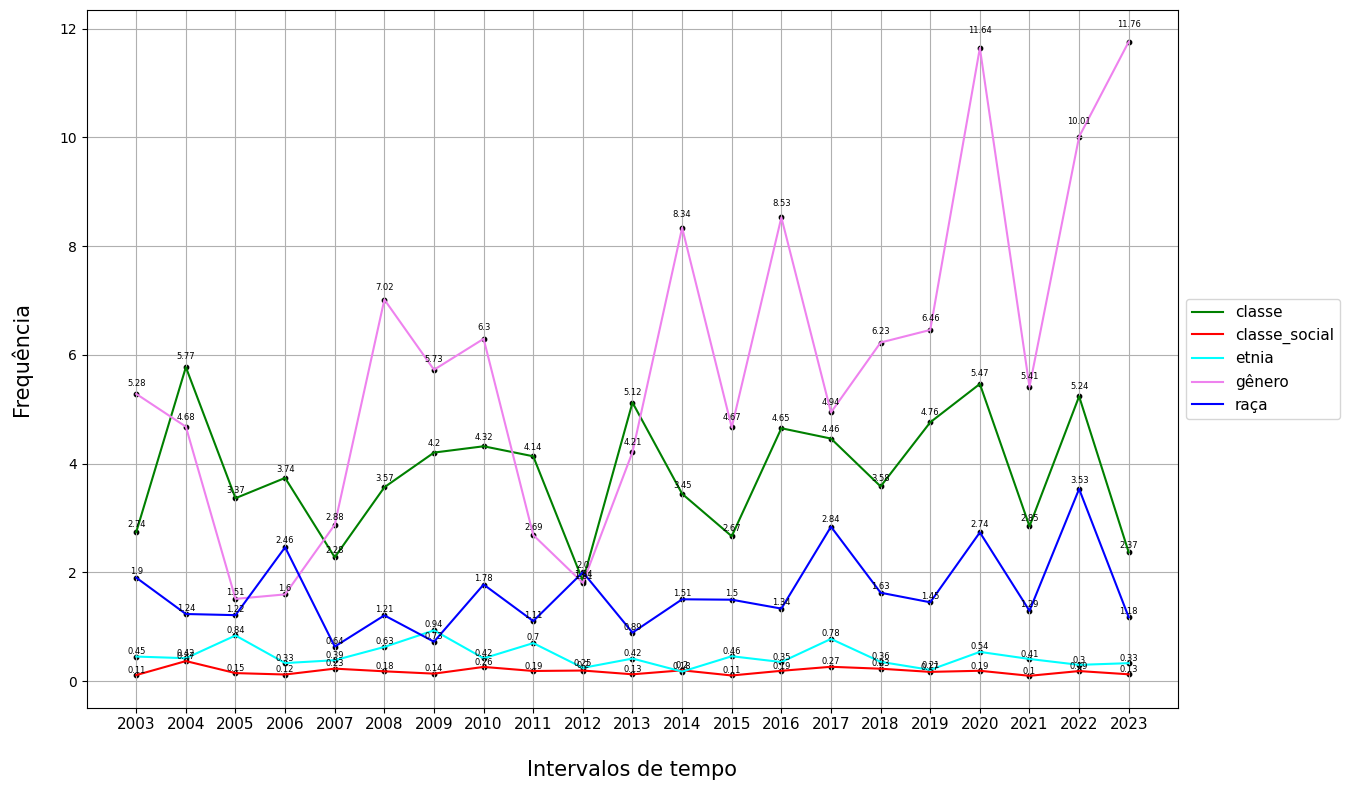



	Imagem salva em /content/RESULTADOS --> Frequências de Palavras Selecionadas 




<Figure size 640x480 with 0 Axes>

In [ ]:
FrequenciaDePalavrasSelecionadasAoDecorrerDoTempo(modelos_treinados=modelos,pasta_para_salvar='/content/RESULTADOS')

In [ ]:
caminho = r'/content/drive/MyDrive/Programa - Repositório Institucional UFSC/Word Embeddings/Frequência no corpus pré-processado'
pastas = [os.path.join(caminho,pasta) for pasta in os.listdir(caminho) if '.' not in pasta]
dic = {}
for pasta in sorted(pastas):
  # print()
  dic[os.path.basename(pasta)] = [arq for arq in os.listdir(pasta) if arq.startswith('dic_frequencias')]

display(dic)

{'Administracao': ['dic_frequencias_Administracao_2003.msgpack',
  'dic_frequencias_Administracao_2004.msgpack',
  'dic_frequencias_Administracao_2005.msgpack',
  'dic_frequencias_Administracao_2006.msgpack',
  'dic_frequencias_Administracao_2007.msgpack',
  'dic_frequencias_Administracao_2008.msgpack',
  'dic_frequencias_Administracao_2009.msgpack',
  'dic_frequencias_Administracao_2010.msgpack',
  'dic_frequencias_Administracao_2011.msgpack',
  'dic_frequencias_Administracao_2012.msgpack',
  'dic_frequencias_Administracao_2013.msgpack',
  'dic_frequencias_Administracao_2014.msgpack',
  'dic_frequencias_Administracao_2015.msgpack',
  'dic_frequencias_Administracao_2016.msgpack',
  'dic_frequencias_Administracao_2017.msgpack',
  'dic_frequencias_Administracao_2018.msgpack',
  'dic_frequencias_Administracao_2019.msgpack',
  'dic_frequencias_Administracao_2020.msgpack',
  'dic_frequencias_Administracao_2021.msgpack',
  'dic_frequencias_Administracao_2022.msgpack',
  'dic_frequencias_Admi